### 캐글 프라이빗 경진대회 베이스 코드
- 베이스 코드는 참가자 분들을 위해 데이터 불러오기, 모델 학습, 결과물 제출까지의 방법을 제공합니다.
- 베이스 코드를 참고하여, 본인만의 전처리와 모델학습 그리고 결과제출을 해주시길 바랍니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#본인의 파일 경로로 지정
train_data = pd.read_csv('../input/cnu-mlclass/train_kaggle.csv')
test_data = pd.read_csv('../input/cnu-mlclass/test_kaggle.csv')

In [3]:
train_data

,index,method,number,orbital_period,mass,distance,year
0,0,Radial Velocity,4,241.258000,1.98100,13.47,1999
1,1,Transit,1,1.337118,NaN,NaN,2011
2,2,Transit,1,1.573292,NaN,350.00,2012
3,3,Radial Velocity,2,3000.000000,NaN,NaN,2014
4,4,Radial Velocity,1,9.494000,0.02600,21.30,2010
...,...,...,...,...,...,...,...
746,746,Radial Velocity,1,772.000000,2.70000,127.88,2011
747,747,Radial Velocity,1,829.000000,0.80000,32.70,2001
748,748,Radial Velocity,1,3.092500,0.95000,27.05,2000
749,749,Transit,2,27.402000,NaN,NaN,2012


- 테스트 데이터에는 'method'가 없으며, 즉 'method' 가 class 입니다.

In [4]:
test_data

,index,number,orbital_period,mass,distance,year
0,0,2,74.720000,0.05318,8.82,2011
1,1,1,2.994330,NaN,560.00,2010
2,2,6,10.303900,NaN,613.00,2010
3,3,1,NaN,NaN,91.83,2013
4,4,1,2.465020,NaN,NaN,2014
...,...,...,...,...,...,...
280,280,6,16.356700,0.03800,39.39,2010
281,281,5,44.380000,0.16500,12.53,2004
282,282,1,615.000000,0.29000,35.88,2011
283,283,1,2.484193,NaN,260.00,2013


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           751 non-null    int64  
 1   method          751 non-null    object 
 2   number          751 non-null    int64  
 3   orbital_period  725 non-null    float64
 4   mass            376 non-null    float64
 5   distance        588 non-null    float64
 6   year            751 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 41.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           285 non-null    int64  
 1   number          285 non-null    int64  
 2   orbital_period  268 non-null    float64
 3   mass            138 non-null    float64
 4   distance        221 non-null    float64
 5   year            285 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 13.5 KB


In [7]:
print("Train 크기:{}".format(train_data.shape))
print("Test 크기:{}".format(test_data.shape))

Train 크기:(751, 7)
Test 크기:(285, 6)


In [8]:
print("train_data 결측치 확인: ",train_data.isnull().sum())
print("----------------------------------------------------")
print("test_data 결측치 확인: ",test_data.isnull().sum())

train_data 결측치 확인:  index               0
method              0
number              0
orbital_period     26
mass              375
distance          163
year                0
dtype: int64
----------------------------------------------------
test_data 결측치 확인:  index               0
number              0
orbital_period     17
mass              147
distance           64
year                0
dtype: int64


In [9]:
df = train_data.corr()
df

,index,number,orbital_period,mass,distance,year
index,1.000000,-0.017091,-0.032350,0.003744,-0.030886,0.014596
number,-0.017091,1.000000,-0.009549,-0.231707,-0.032476,0.139381
orbital_period,-0.032350,-0.009549,1.000000,0.157797,-0.034874,-0.033019
mass,0.003744,-0.231707,0.157797,1.000000,0.265556,-0.102629
distance,-0.030886,-0.032476,-0.034874,0.265556,1.000000,0.171938
year,0.014596,0.139381,-0.033019,-0.102629,0.171938,1.000000


In [10]:
sf = test_data.corr()
sf

,index,number,orbital_period,mass,distance,year
index,1.000000,-0.042313,-0.075087,0.025191,0.064172,-0.062581
number,-0.042313,1.000000,-0.120924,-0.258641,-0.040118,0.154960
orbital_period,-0.075087,-0.120924,1.000000,0.235283,-0.137524,-0.086453
mass,0.025191,-0.258641,0.235283,1.000000,0.304665,-0.177088
distance,0.064172,-0.040118,-0.137524,0.304665,1.000000,0.198086
year,-0.062581,0.154960,-0.086453,-0.177088,0.198086,1.000000


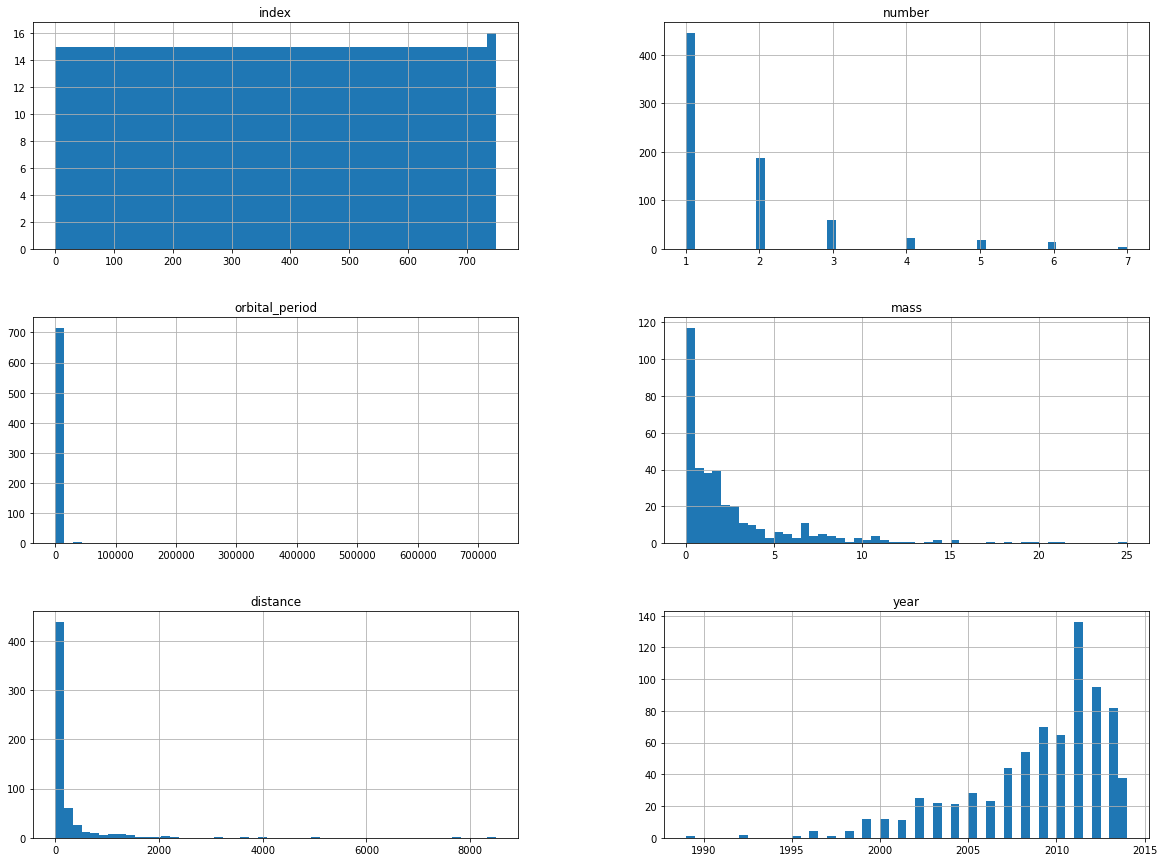

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

### 데이터 전처리
- 베이스 코드에서는 간단하게 결측치를 0 값으로 채우도록 데이터를 전처리 하겠습니다.
- 그리고 현재 method가 문자열이기에 이를 숫자로 변환하는 작업을 해주겠습니다.

In [12]:
#수치형 변수에 포함되는 데이터 타입 선정

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


#결측치는 0으로 채우기

train_data[train_data.select_dtypes(include=numerics).columns] = \
    train_data[train_data.select_dtypes(include=numerics).columns].fillna(0)
#.fillna(train_data[train_data.select_dtypes(include=numerics).columns].median())

test_data[test_data.select_dtypes(include=numerics).columns] = \
    test_data[test_data.select_dtypes(include=numerics).columns].fillna(0)

In [13]:
print("train_data 결측치 확인: ",train_data.isnull().sum())
print("----------------------------------------------------")
print("test_data 결측치 확인: ",test_data.isnull().sum())

train_data 결측치 확인:  index             0
method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64
----------------------------------------------------
test_data 결측치 확인:  index             0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64


In [14]:
test_data_re = test_data.drop(['index'], axis=1)
test_data_re

,number,orbital_period,mass,distance,year
0,2,74.720000,0.05318,8.82,2011
1,1,2.994330,0.00000,560.00,2010
2,6,10.303900,0.00000,613.00,2010
3,1,0.000000,0.00000,91.83,2013
4,1,2.465020,0.00000,0.00,2014
...,...,...,...,...,...
280,6,16.356700,0.03800,39.39,2010
281,5,44.380000,0.16500,12.53,2004
282,1,615.000000,0.29000,35.88,2011
283,1,2.484193,0.00000,260.00,2013


In [15]:
train_data_re = train_data.drop(['index'], axis=1)
train_data_re

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,4,241.258000,1.98100,13.47,1999
1,Transit,1,1.337118,0.00000,0.00,2011
2,Transit,1,1.573292,0.00000,350.00,2012
3,Radial Velocity,2,3000.000000,0.00000,0.00,2014
4,Radial Velocity,1,9.494000,0.02600,21.30,2010
...,...,...,...,...,...,...
746,Radial Velocity,1,772.000000,2.70000,127.88,2011
747,Radial Velocity,1,829.000000,0.80000,32.70,2001
748,Radial Velocity,1,3.092500,0.95000,27.05,2000
749,Transit,2,27.402000,0.00000,0.00,2012


In [16]:
df = train_data_re.corr()
df

,number,orbital_period,mass,distance,year
number,1.000000,-0.007949,-0.162993,-0.040461,0.139381
orbital_period,-0.007949,1.000000,-0.018106,-0.022731,-0.033071
mass,-0.162993,-0.018106,1.000000,-0.094676,-0.246318
distance,-0.040461,-0.022731,-0.094676,1.000000,0.102533
year,0.139381,-0.033071,-0.246318,0.102533,1.000000


In [17]:
sf = train_data_re.corr()
sf

,number,orbital_period,mass,distance,year
number,1.000000,-0.007949,-0.162993,-0.040461,0.139381
orbital_period,-0.007949,1.000000,-0.018106,-0.022731,-0.033071
mass,-0.162993,-0.018106,1.000000,-0.094676,-0.246318
distance,-0.040461,-0.022731,-0.094676,1.000000,0.102533
year,0.139381,-0.033071,-0.246318,0.102533,1.000000


In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data['method'])
train_data['method'] = encoder.transform(train_data['method'])

In [19]:
encoder.fit(train_data_re['method'])
train_data_re['method'] = encoder.transform(train_data_re['method'])

In [20]:
train_data['method']

0      0
1      1
2      1
3      0
4      0
      ..
746    0
747    0
748    0
749    1
750    0
Name: method, Length: 751, dtype: int64

In [21]:
train_data_re['method']

0      0
1      1
2      1
3      0
4      0
      ..
746    0
747    0
748    0
749    1
750    0
Name: method, Length: 751, dtype: int64

In [22]:
#train_data_re = train_data_re.drop(['number'], axis=1)
#test_data_re = test_data_re.drop(['number'], axis=1)
#test_data_re

In [23]:
df = train_data_re.corr()
df

,method,number,orbital_period,mass,distance,year
method,1.000000,0.029439,0.139096,-0.368148,0.257297,0.334770
number,0.029439,1.000000,-0.007949,-0.162993,-0.040461,0.139381
orbital_period,0.139096,-0.007949,1.000000,-0.018106,-0.022731,-0.033071
mass,-0.368148,-0.162993,-0.018106,1.000000,-0.094676,-0.246318
distance,0.257297,-0.040461,-0.022731,-0.094676,1.000000,0.102533
year,0.334770,0.139381,-0.033071,-0.246318,0.102533,1.000000


### 검증 데이터로 분리
- 베이스 코드에는 모델의 성능을 비교해보기 위해  train 데이터에서 일부를 validation 데이터로 나눠서 진행하겠습니다.(의무사항 아님)

In [24]:
from sklearn.model_selection import train_test_split

train_data_re, val_data = train_test_split(train_data_re, test_size = 0.3, random_state=2002, shuffle=True)

In [25]:
print(train_data_re.shape)
print(val_data.shape)

(525, 6)
(226, 6)


In [26]:
X_train = train_data_re.drop(['method'], axis = 1)
X_val = val_data.drop(['method'], axis = 1)
X_test = test_data_re

y_train = train_data_re['method']
y_val = val_data['method']


print("X_train의 shape: ", X_train.shape)
print("X_val의 shape: ", X_val.shape)
print("X_test의 shape: ", X_test.shape)
print("\t")
print("y_train의 shape: ", y_train.shape)
print("y_val의 shape: ", y_val.shape)

X_train의 shape:  (525, 5)
X_val의 shape:  (226, 5)
X_test의 shape:  (285, 5)
	
y_train의 shape:  (525,)
y_val의 shape:  (226,)


In [27]:
print(X_train)
print(X_val)
print(X_test)
print(y_train)
print(y_val)

     number  orbital_period  mass  distance  year
729       1        4.426400  0.00      0.00  2012
621       1        3.855900  0.00    480.00  2012
501       1        0.000000  0.00    140.00  2004
602       1        6.495000  0.96    121.07  2010
448       4       13.570800  0.00      0.00  2014
..      ...             ...   ...       ...   ...
56        1      163.900000  5.02     65.79  2008
684       1        1.763589  0.00      0.00  2011
329       1        1.628431  0.00    300.00  2008
402       1        9.434150  0.00    200.00  2013
593       1        2.423804  0.00      0.00  2011

[525 rows x 5 columns]
     number  orbital_period     mass  distance  year
723       1     1840.000000  1.60000     67.61  2009
507       1       41.397000  0.29800     11.03  2010
719       2       12.282900  0.00000      0.00  2011
401       1      225.700000  0.21000     29.94  2010
599       1       48.056000  0.21000     51.26  2005
..      ...             ...      ...       ...   ...
6    

### 모델 학습

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.metrics import f1_score


In [29]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=13, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_rnd_pred = rnd_clf.predict(X_val)

print(rnd_clf.score(X_train, y_train))
print(rnd_clf.score(X_val, y_val))
print(f1_score(y_val, y_rnd_pred, average=None))

0.9809523809523809
0.9557522123893806
[0.96062992 0.97619048 0.8       ]


In [30]:
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)

y_svm_pred = svm_clf.predict(X_val)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [31]:
print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_val, y_val))
print(f1_score(y_val, y_svm_pred, average=None))

0.7542857142857143
0.7699115044247787
[0.81702128 0.7839196  0.        ]


In [32]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_knn_pred = knn_clf.predict(X_val)

In [33]:
print(knn_clf.score(X_train, y_train))
print(knn_clf.score(X_val, y_val))
print(f1_score(y_val, y_knn_pred, average=None))

1.0
0.8893805309734514
[0.93076923 0.89820359 0.4       ]


In [34]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

#모델 파라미터 조정(규제 파라미터 및 반복 학습 횟수)
lr_clf = LogisticRegression(C=14, max_iter=1000)
lr_clf.fit(X_train, y_train)
y_lr_pred = lr_clf.predict(X_val)

print(lr_clf.score(X_train, y_train))
print(lr_clf.score(X_val, y_val))
print(f1_score(y_val, y_lr_pred, average=None))

0.8380952380952381
0.831858407079646
[0.8879668  0.82795699 0.32      ]


In [35]:
import xgboost

xgb_clf = xgboost.XGBClassifier()
xgb_clf.objective = 'multi:softmax'
xgb_clf.fit(X_train, y_train)
y_xgb_pred = xgb_clf.predict(X_val)
print(xgb_clf.score(X_train, y_train))
print(xgb_clf.score(X_val, y_val))
print(f1_score(y_val, y_xgb_pred, average=None))

[05:12:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1.0
0.9646017699115044
[0.96825397 0.97005988 0.90909091]


In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=250, max_samples=120, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_val)
print(bag_clf.score(X_train, y_train))
print(bag_clf.score(X_val, y_val))

0.9733333333333334
0.9557522123893806


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(estimators=[('rf', rnd_clf), ('xgb', xgb_clf), ('bag', bag_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:12:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_leaf_nodes=13,
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0,...
                                            monotone_constraints='()',
            

In [38]:
print(voting_clf.score(X_train, y_train))
print(voting_clf.score(X_val, y_val))

0.9866666666666667
0.9690265486725663


### 모델 성능 확인   

- 경진대회 평가방식은 "mean F1 score" 입니다.
- 다만 여러 방법으로 모델의 성능을 확인하는 것은 자유롭게 가능합니다. 

In [39]:
# test_predicted = encoder.inverse_transform(knn_clf.predict(X_test))
test_predicted = encoder.inverse_transform(voting_clf.predict(X_test))

In [40]:

X_result = pd.concat([test_data['index'], X_test],axis=1)
X_result

,index,number,orbital_period,mass,distance,year
0,0,2,74.720000,0.05318,8.82,2011
1,1,1,2.994330,0.00000,560.00,2010
2,2,6,10.303900,0.00000,613.00,2010
3,3,1,0.000000,0.00000,91.83,2013
4,4,1,2.465020,0.00000,0.00,2014
...,...,...,...,...,...,...
280,280,6,16.356700,0.03800,39.39,2010
281,281,5,44.380000,0.16500,12.53,2004
282,282,1,615.000000,0.29000,35.88,2011
283,283,1,2.484193,0.00000,260.00,2013


In [41]:
sample_sub = pd.DataFrame({'index': X_result['index'], 'method': test_predicted})

In [42]:
sample_sub

,index,method
0,0,Radial Velocity
1,1,Transit
2,2,Transit
3,3,others
4,4,Transit
...,...,...
280,280,Radial Velocity
281,281,Radial Velocity
282,282,Radial Velocity
283,283,Transit


In [43]:
sample_sub.to_csv("baseline_17.csv", index=False)